# Exploratory Data Analysis 

The data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records. 

A good way to download the dataset would be using the kaggle-api command below with `--wp` mentions the current working path.

In [1]:
!kaggle datasets download -d uciml/indian-liver-patient-records -f indian_liver_patient.csv --wp

indian_liver_patient.csv: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("indian_liver_patient.csv")
df.describe().T

count        mean         std   min    25%  \
Age                         583.0   44.746141   16.189833   4.0   33.0   
Total_Bilirubin             583.0    3.298799    6.209522   0.4    0.8   
Direct_Bilirubin            583.0    1.486106    2.808498   0.1    0.2   
Alkaline_Phosphotase        583.0  290.576329  242.937989  63.0  175.5   
Alamine_Aminotransferase    583.0   80.713551  182.620356  10.0   23.0   
Aspartate_Aminotransferase  583.0  109.910806  288.918529  10.0   25.0   
Total_Protiens              583.0    6.483190    1.085451   2.7    5.8   
Albumin                     583.0    3.141852    0.795519   0.9    2.6   
Albumin_and_Globulin_Ratio  579.0    0.947064    0.319592   0.3    0.7   
Dataset                     583.0    1.286449    0.452490   1.0    1.0   

                               50%    75%     max  
Age                          45.00   58.0    90.0  
Total_Bilirubin               1.00    2.6    75.0  
Direct_Bilirubin              0.30    1.3    19.7  
Alkaline_Phosphotase        208.00  298.0  2110.0  
Alamine_Aminotransferase     35.00   60.5  2000.0  
Aspartate_Aminotransferase   42.00   87.0  4929.0  
Total_Protiens                6.60    7.2     9.6  
Albumin                       3.10    3.8     5.5  
Albumin_and_Globulin_Ratio    0.93    1.1     2.8  
Dataset                       1.00    2.0     2.0

In [4]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

A naive observation using `df.info()` suggests that there are no missing values other than those in `Albumin_and_Globulin_Ratio`

With `Dataset` being the target variable, we can observe that there is data imbalance with majority of data being `1`. And, for easier analysis, we can replace the class label `2` with `0` which would make it easier to calculate aggregate functions.

In [5]:
df.loc[df["Dataset"] == 2, "Dataset"] = 0
df["Dataset"].value_counts()

1    416
0    167
Name: Dataset, dtype: int64

## Univariate Analysis

### Age

Age variable follows an almost bell shaped distribution, with most of the samples being middle aged and a significantly small proportion of toddlers and senior citizens.

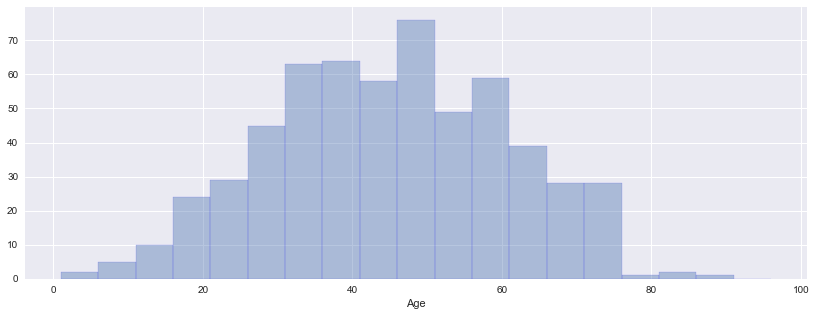

In [44]:
sns.set(rc={'figure.figsize':(14,5)})
sns.distplot(df["Age"], bins = range(1,100,5), hist_kws = {'edgecolor':'b'}, kde = False)

In [7]:
group = np.array(["kid", "teen", "adult", "middle", "senior"])

df["Age_Group"] = group[np.digitize(df["Age"], bins = [11, 21, 41, 61])]
df["Age_Group"].value_counts()

middle    242
adult     201
senior     99
teen       34
kid         7
Name: Age_Group, dtype: int64

In [8]:
df.groupby(by = "Age_Group").agg({'Dataset' : 'mean'}).rename(columns = {'Dataset' : 'Proportion'}).reset_index()

Age_Group  Proportion
0     adult    0.671642
1       kid    0.428571
2    middle    0.768595
3    senior    0.727273
4      teen    0.588235

### Gender

Using a simple `df.groupby` we can conclude that men are more probable to have liver disease than women, which is what the norm is.

In [9]:
df.groupby("Gender").Dataset.mean()

Gender
Female    0.647887
Male      0.734694
Name: Dataset, dtype: float64

### Bilirubin Levels

Bilirubin, found in our blood stream is yellow in colour which when passes through the liver, is conjugated and used in digestion. But with a diseased liver, Bilirubin may not be conjugated and further excreted properly and hence increasing it's concentration in our blood stream. This would result in a yellowish coored blood which is observed i our eyes and skin. This condition is called **jaundice**. Hence, abnormally high bilirubin levels are often indicative of liver disease. Total and Direct Bilirubin Blood Test can help a person's doctor to differentiate between different types of liver disorders. [More about it here](https://www.healthline.com/health/bilirubin-blood#purpose)

With majority of the samples include positive results, we can expect the Bilirubin values to be pretty high. But counter-intuitively, we can observe that (from initial `df.descibe`) the Bilirubin concentration are pretty small other than few outliers, small enough to be in the healthy range

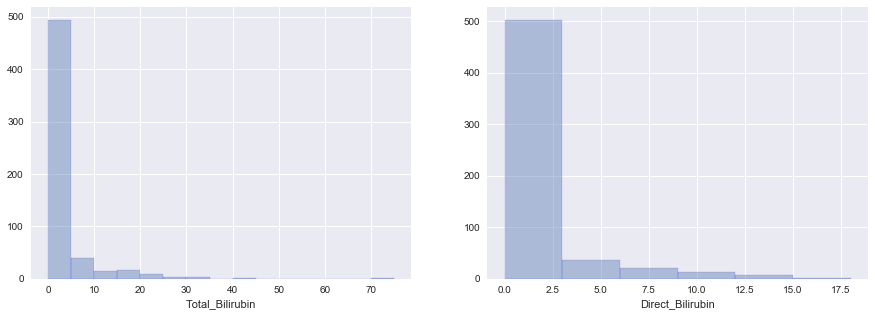

In [10]:
sns.set(rc={'figure.figsize':(15,5)})
fig, axes = plt.subplots(1, 2)

sns.distplot(df["Total_Bilirubin"], bins = range(0, 80, 5), hist_kws = {'edgecolor':'b'}, kde = False, ax = axes[0])
sns.distplot(df["Direct_Bilirubin"], bins = range(0, 20, 3), hist_kws = {'edgecolor':'b'}, kde = False, ax = axes[1])

Bilirubin value range is pretty huge, hence we might need to transform the values into a logarithmic scale, for visualization and also better analysis.

### Aminotransferase

The alanine aminotransferase and aspartate aminotransferase are enzymes found mainly in your liver. Smaller amounts of those are found in your kidneys and other organs, too. Normally, their levels in the blood are low. If your liver is damaged, it will release more of these enzymes into your blood and their levels will rise. But a higher level of these enzymes need not always indicate liver damage as they can be due to damage of other organs as well.

In [28]:
df[["Alamine_Aminotransferase", "Aspartate_Aminotransferase"]].describe().T

count        mean         std   min   25%   50%  \
Alamine_Aminotransferase    583.0   80.713551  182.620356  10.0  23.0  35.0   
Aspartate_Aminotransferase  583.0  109.910806  288.918529  10.0  25.0  42.0   

                             75%     max  
Alamine_Aminotransferase    60.5  2000.0  
Aspartate_Aminotransferase  87.0  4929.0

The above 5-point summary suggests that the Range of levels of both the enzymes are quite huge. Also, majority of the observations (75% of them, to be precise) lie within a smaller value. We can treat the higher values (a general norm is 1.5 * IQR) as outliers, though definitely not to be removed.

To make the visualisation scrutable, we can scale down the variables to their natural logarithms because log() is a monotonic increasing functions and the variation in the observations would still be preserved.

In [27]:
log_tranformerd = np.log(df[["Alamine_Aminotransferase", "Aspartate_Aminotransferase"]])

log_tranformerd.describe().T

count      mean       std       min       25%  \
Alamine_Aminotransferase    583.0  3.751829  0.900236  2.302585  3.135494   
Aspartate_Aminotransferase  583.0  3.956771  0.997381  2.302585  3.218876   

                                 50%       75%       max  
Alamine_Aminotransferase    3.555348  4.102609  7.600902  
Aspartate_Aminotransferase  3.737670  4.465908  8.502891

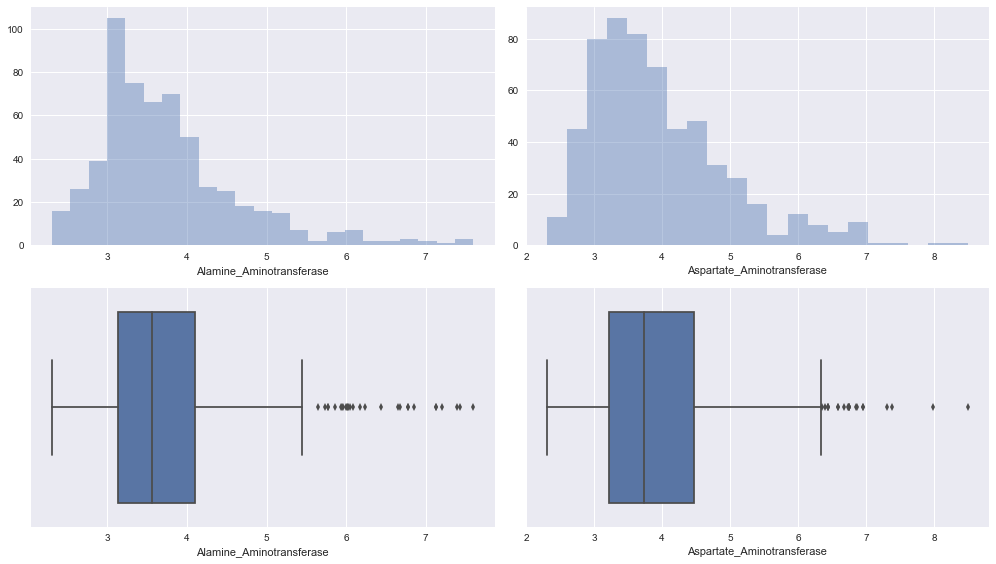

In [45]:
sns.set(rc={'figure.figsize':(14,8)})
fig, axes = plt.subplots(2,2)

sns.distplot(log_tranformerd["Alamine_Aminotransferase"], ax = axes[0][0], kde = False)
sns.distplot(log_tranformerd["Aspartate_Aminotransferase"], ax = axes[0][1], kde = False)
sns.boxplot(log_tranformerd["Alamine_Aminotransferase"], ax = axes[1][0])
sns.boxplot(log_tranformerd["Aspartate_Aminotransferase"], ax = axes[1][1])

plt.tight_layout()

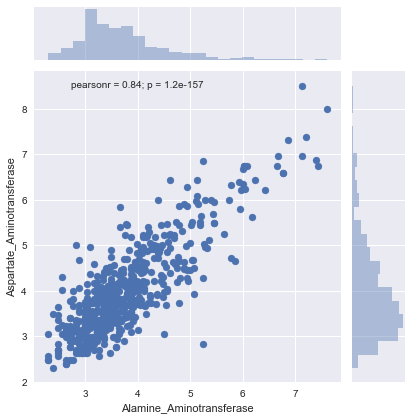

In [52]:
sns.jointplot(log_tranformerd["Alamine_Aminotransferase"], log_tranformerd["Aspartate_Aminotransferase"])